In [2]:
import pandas as pd
import plotnine as pn

In [2]:
df = pd.read_csv('cp_all_pitches.csv')

In [3]:
df.head()

,RelSpeed,InducedVertBreak,HorzBreak,SpinRate,Tilt,TaggedPitchType
0,87.18190,14.38265,-4.83126,2045.342795,11.15,Fastball
1,87.84622,21.74119,10.24571,2200.511334,1.00,Fastball
2,87.35602,19.03017,14.82997,2176.408546,1.15,Fastball
3,87.96588,17.11847,15.07520,2311.471220,1.30,Fastball
4,86.99718,21.67887,11.73820,2243.126279,1.00,Fastball


In [4]:
df['TaggedPitchType'].value_counts()

TaggedPitchType
Fastball            3026
ChangeUp             815
Cutter               620
Slider               536
Curveball            382
Sinker               107
FourSeamFastBall      27
TwoSeamFastBall       16
Sweeper               15
Splitter               2
Other                  1
Undefined              1
Name: count, dtype: int64

In [5]:
df = df[df['TaggedPitchType'].isin(['Fastball', 'ChangeUp', 'Cutter', 'Slider', 'Curveball'])]

In [6]:
df['TaggedPitchType'].value_counts()

TaggedPitchType
Fastball     3026
ChangeUp      815
Cutter        620
Slider        536
Curveball     382
Name: count, dtype: int64

In [14]:
df.to_csv('updated_pitches.csv', index=False)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
df[['RelSpeed', 'InducedVertBreak', 'HorzBreak', 'SpinRate', 'Tilt']] = scaler.fit_transform(df[['RelSpeed', 'InducedVertBreak', 'HorzBreak', 'SpinRate', 'Tilt']])

In [8]:
df.groupby('TaggedPitchType').mean()

,RelSpeed,InducedVertBreak,HorzBreak,SpinRate,Tilt
TaggedPitchType,,,,,
ChangeUp,-0.934345,-0.071515,0.362933,-1.444358,-0.386568
Curveball,-1.461530,-2.705194,-0.694590,1.615639,-0.076453
Cutter,-0.178540,-0.407009,0.063129,0.518640,0.202805
Fastball,0.673641,0.599224,-0.058448,0.008082,0.126521
Slider,-1.134230,-0.875444,0.200125,0.399191,-0.306594


In [9]:
count_df = df['TaggedPitchType'].value_counts().reset_index(name='count')
count_df['TaggedPitchType'] = pd.Categorical(count_df['TaggedPitchType'], categories=count_df.sort_values('count', ascending=False)['TaggedPitchType'], ordered=True)

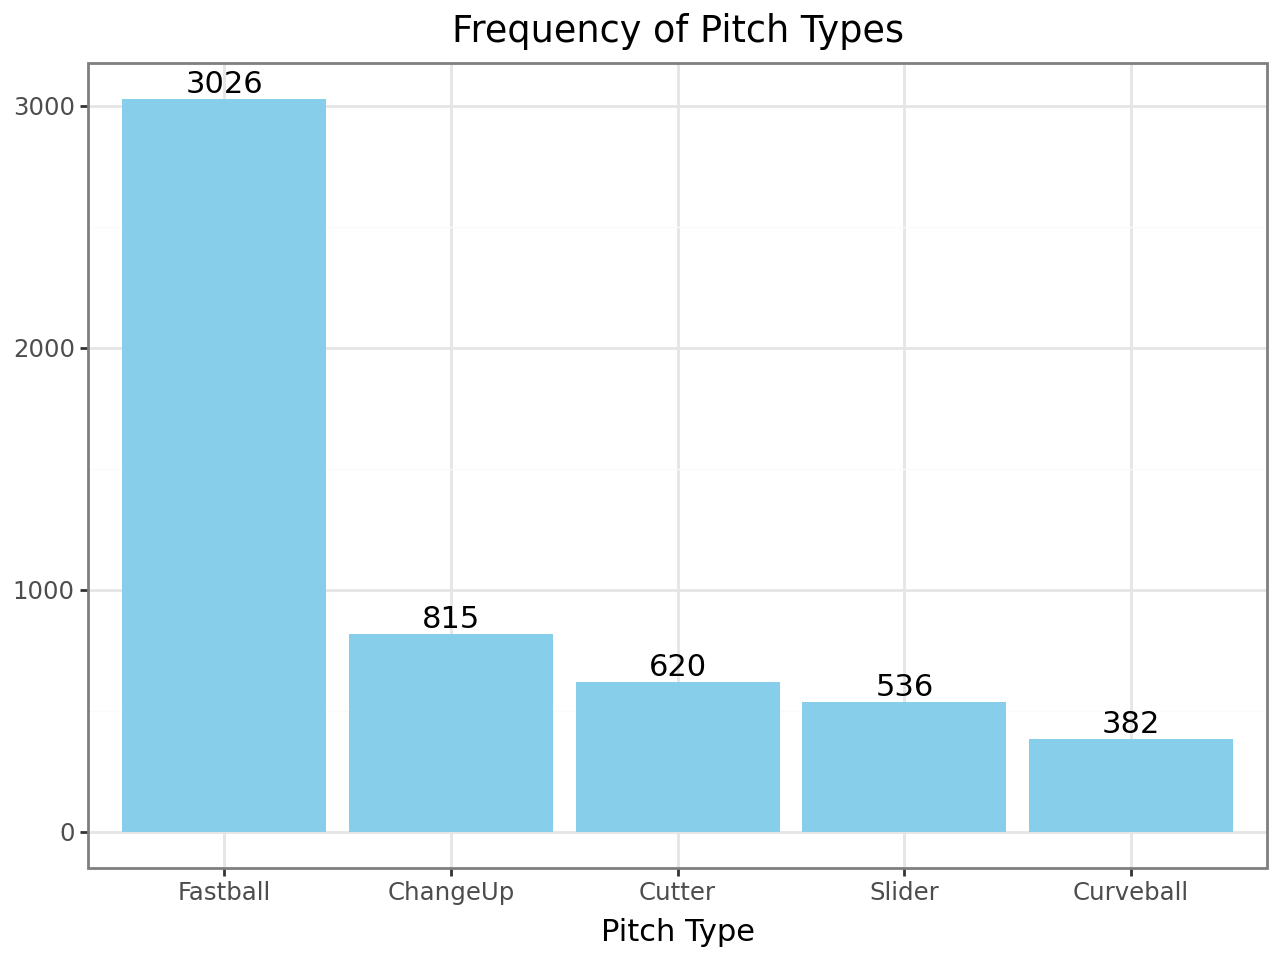

In [11]:
(
    pn.ggplot(count_df, pn.aes(x='TaggedPitchType', y='count'))
    + pn.geom_bar(stat='identity', fill='skyblue')
    + pn.geom_text(pn.aes(label='count'), va='bottom')
    + pn.theme_bw()
    + pn.labs(x='Pitch Type', y='', title='Frequency of Pitch Types')
)

In [12]:
df_long = df.melt(
    id_vars=[col for col in df.columns if col not in df.loc[:, 'RelSpeed':'Tilt'].columns],
    value_vars=df.loc[:, 'RelSpeed':'Tilt'].columns,
    var_name='feature',
    value_name='value'
)

In [13]:
df_long.head()

,TaggedPitchType,feature,value
0,Fastball,RelSpeed,0.253198
1,Fastball,RelSpeed,0.376373
2,Fastball,RelSpeed,0.285483
3,Fastball,RelSpeed,0.398560
4,Fastball,RelSpeed,0.218948


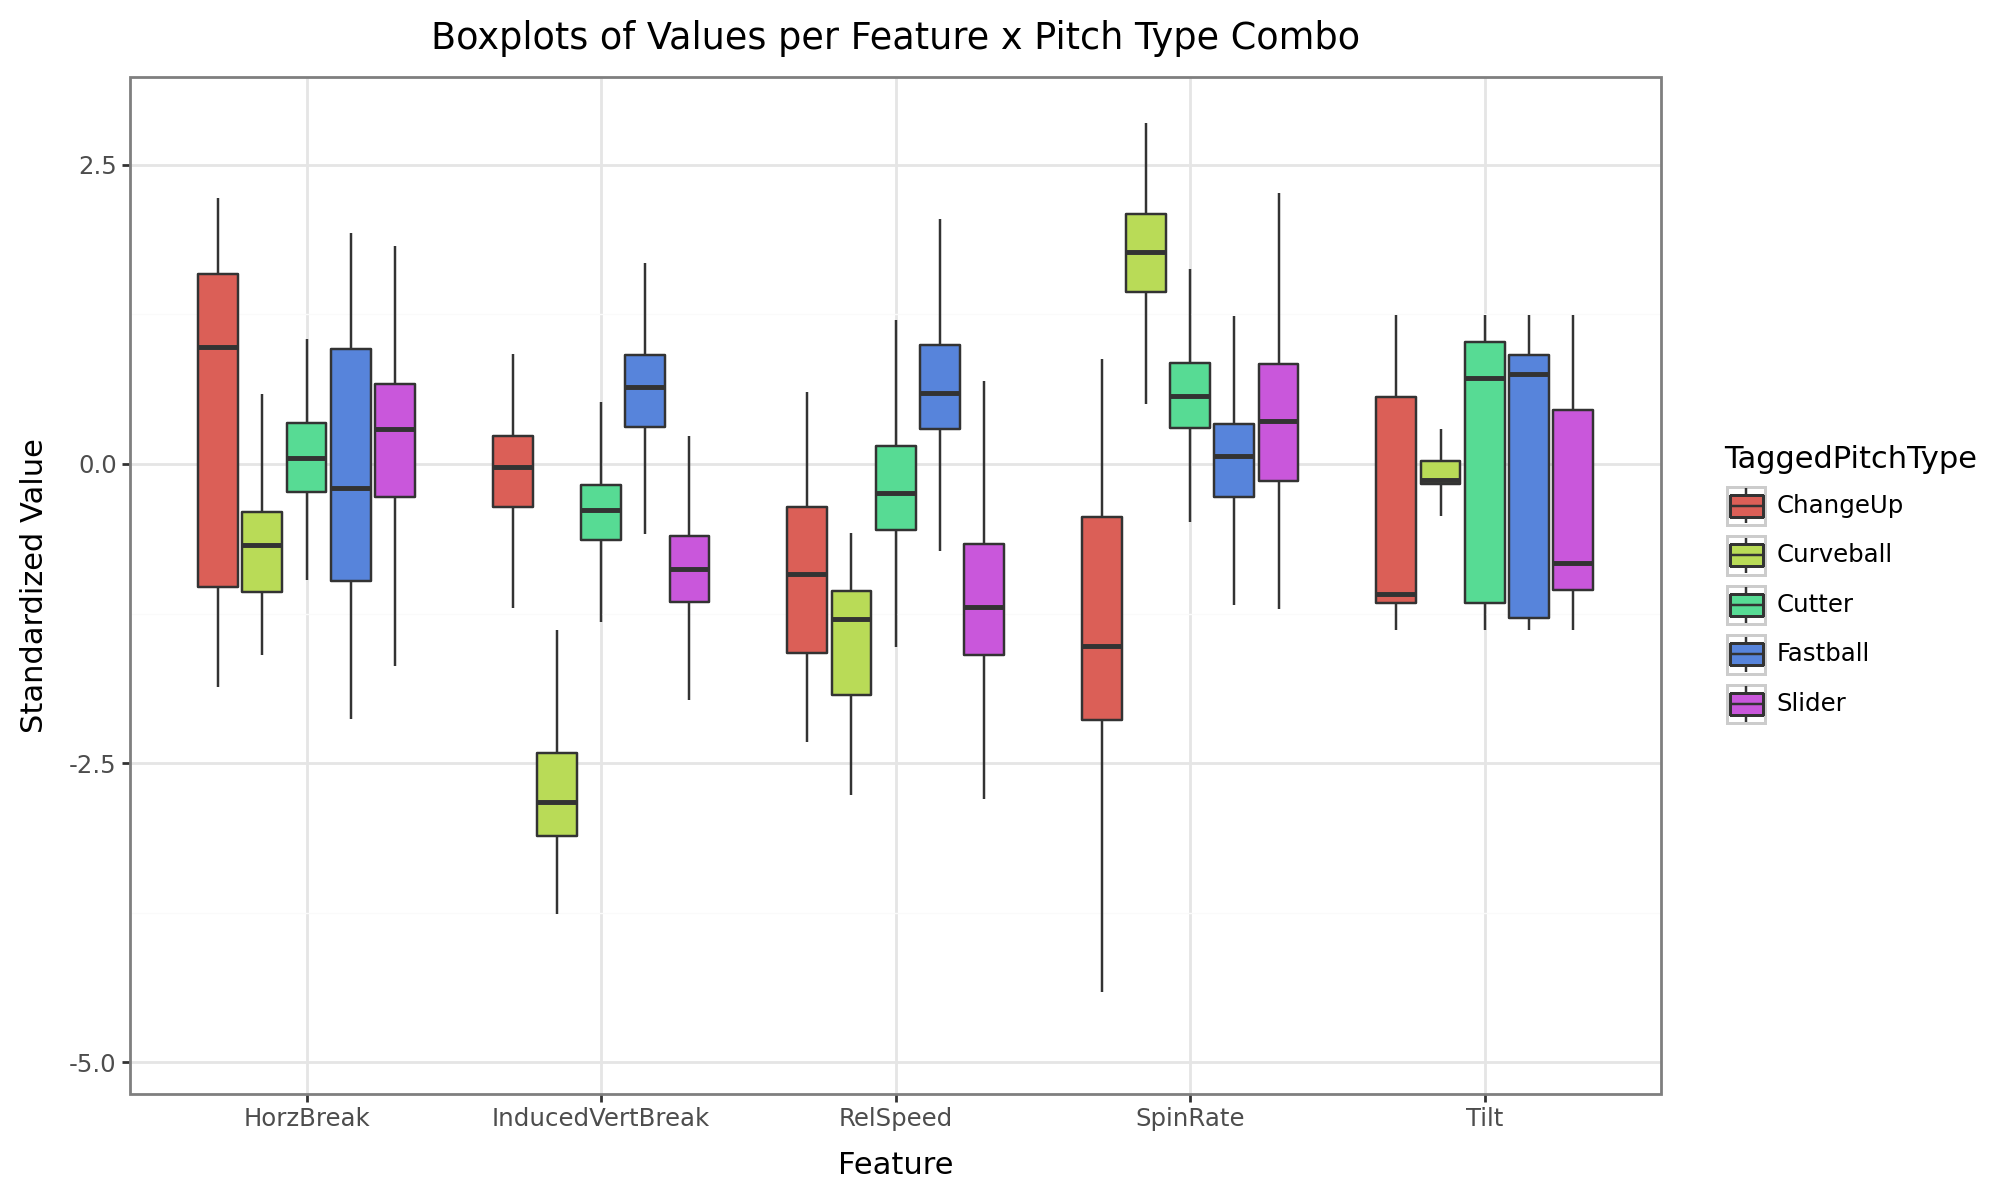

In [14]:
(
    pn.ggplot(df_long, pn.aes(x='feature', y='value', fill='TaggedPitchType'))
    + pn.geom_boxplot(outlier_alpha=0)
    + pn.theme_bw()
    + pn.theme(figure_size=(10, 6))
    + pn.labs(x='Feature', y='Standardized Value', title='Boxplots of Values per Feature x Pitch Type Combo')
)


In [3]:
# from feature importance:
# InducedVertBreak: 4038.0000
# SpinRate: 4012.0000
# HorzBreak: 3928.0000
# RelSpeed: 3906.0000
# Tilt: 2587.0000

vip = pd.DataFrame({'Feature': ['RelSpeed', 'InducedVertBreak', 'SpinRate', 'HorzBreak', 'Tilt'], 
                    'Importance': [61272.21, 60527.755, 43421.8663, 25038.5387, 13272.3305]})
vip['Feature'] = pd.Categorical(vip['Feature'], categories=vip.sort_values('Importance', ascending=False)['Feature'], ordered=True)

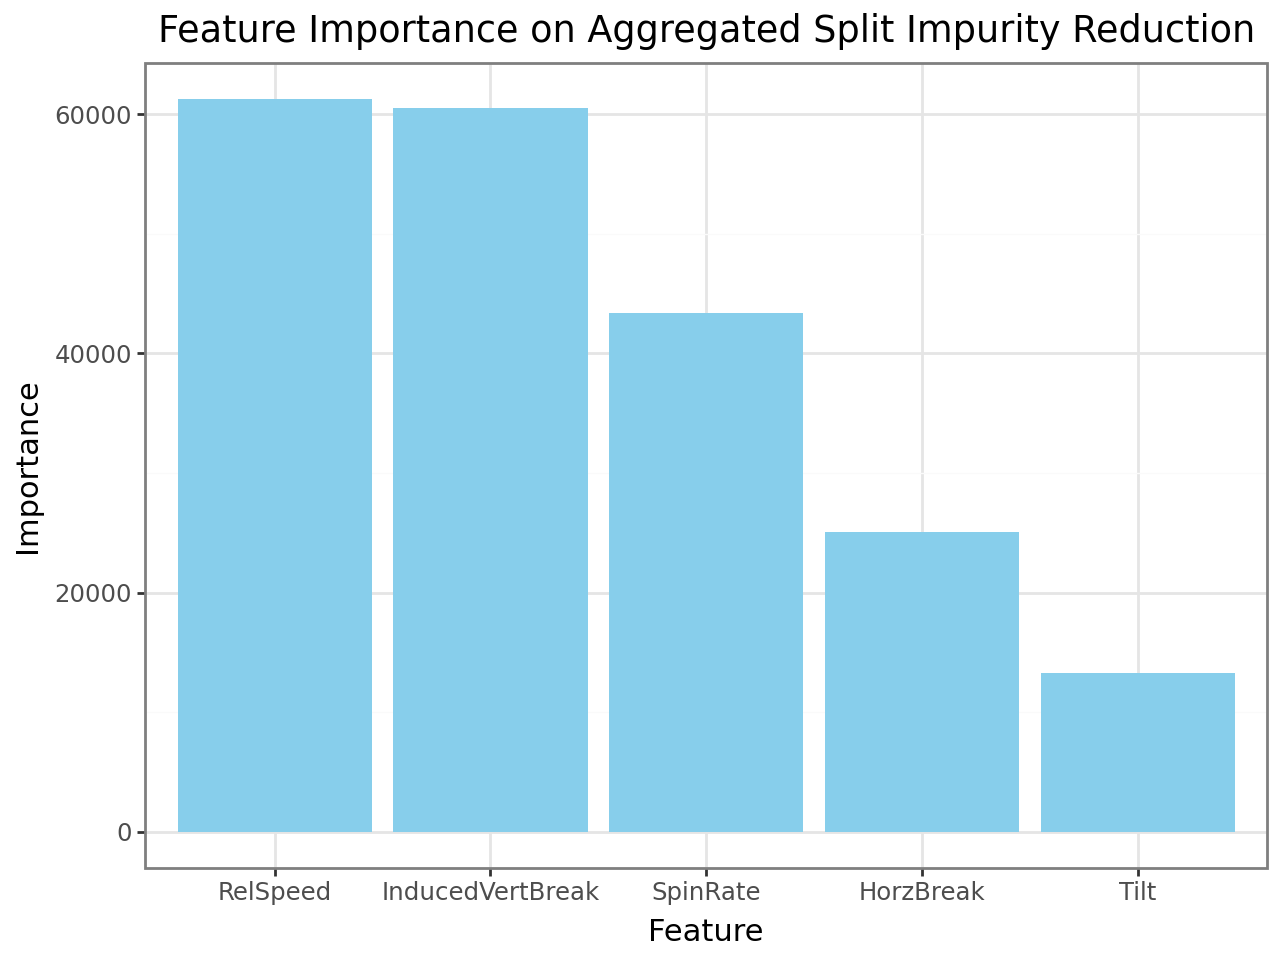

In [6]:
(
    pn.ggplot(vip, pn.aes(x='Feature', y='Importance')) 
    + pn.geom_bar(stat='identity', fill='skyblue')
    + pn.theme_bw() 
    + pn.labs(title = 'Feature Importance on Aggregated Split Impurity Reduction')

)